In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

In [2]:
 # Load the dataset
accidents = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [3]:
 # Display the first few rows of the dataset
print(accidents.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [4]:
# Clean 'Start_Time' and convert to datetime
# First, remove any extra characters and try to convert
accidents['Start_Time'] = accidents['Start_Time'].str.split('.').str[0]
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'], errors='coerce')

# Check if there are any rows with NaT after conversion
missing_times = accidents[accidents['Start_Time'].isna()]
print(f'Number of rows with invalid Start_Time: {missing_times.shape[0]}')

# Remove rows with NaT in 'Start_Time'
accidents = accidents.dropna(subset=['Start_Time'])

Number of rows with invalid Start_Time: 0


In [5]:
print(accidents.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
0 -84.058723      NaN      NaN          0.01  ...      False   False  False   
1 -82.831184      NaN      NaN          0.01  ...      False   False  False   
2 -84.032608      NaN      NaN          0.01  ...      False   False  False   
3 -84.205582      NaN      NaN          0.01  ...      False   False  False   
4 -84.188354      NaN      NaN          0.01  ...      False   False  False   

  Traffic_Calming Traffic_Signal Turni

In [6]:
# Extract hour, day of the week, and month
accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['DayOfWeek'] = accidents['Start_Time'].dt.dayofweek
accidents['Month'] = accidents['Start_Time'].dt.month

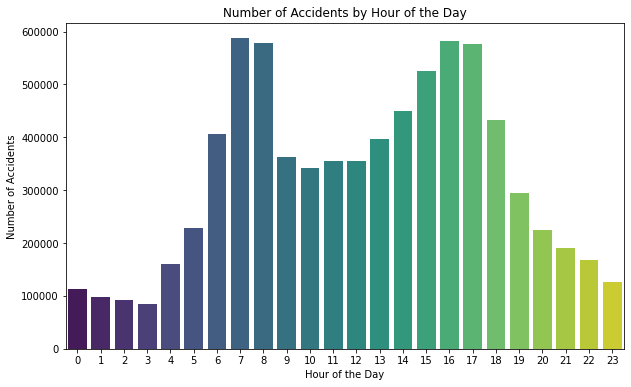

In [7]:
# Analysis of accidents by time of day
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=accidents, palette='viridis')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

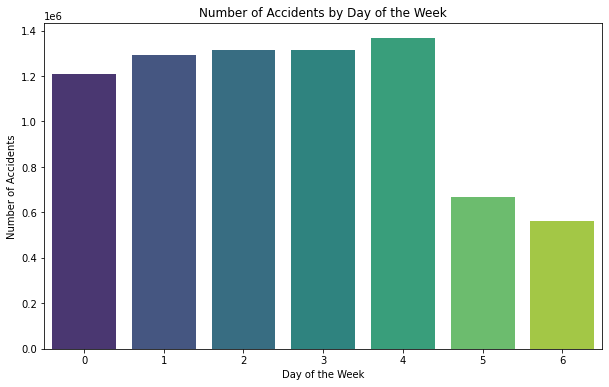

In [8]:
# Analysis of accidents by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=accidents, palette='viridis')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

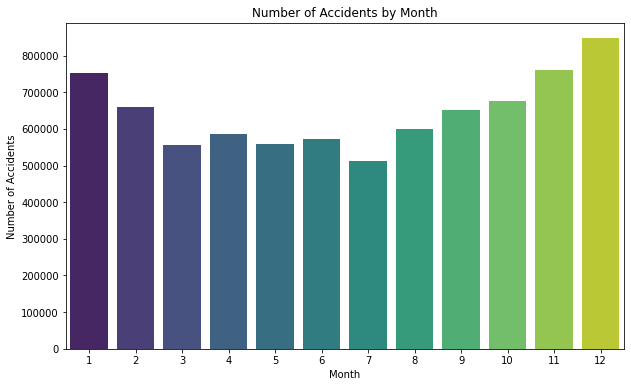

In [9]:
# Analysis of accidents by month
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=accidents, palette='viridis')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

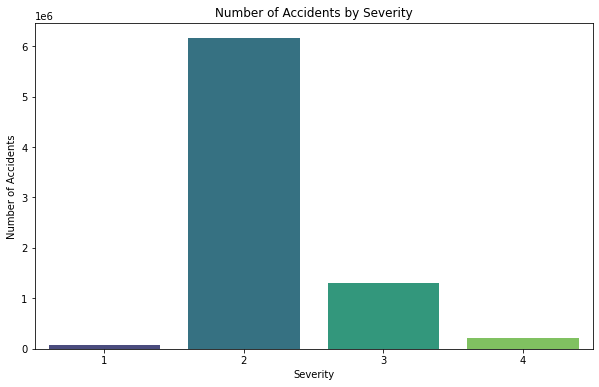

In [10]:
# Analysis of accidents by severity
plt.figure(figsize=(10,6))
sns.countplot(x='Severity', data=accidents, palette='viridis')
plt.title('Number of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

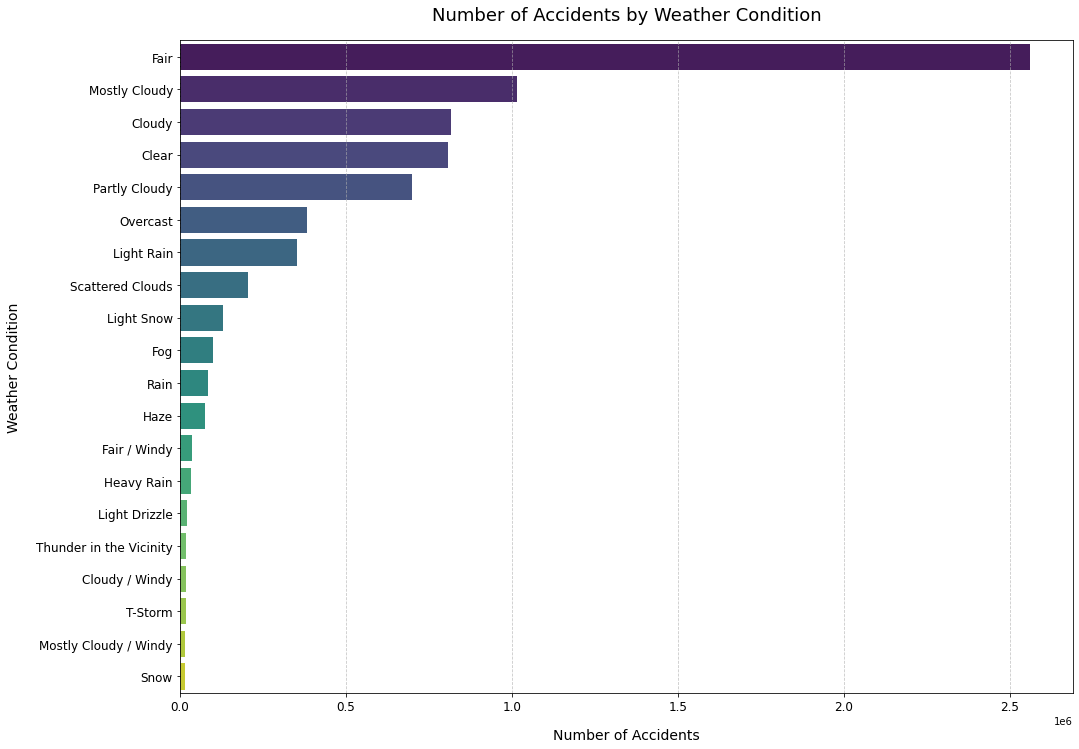

In [11]:
# Analysis of accidents by weather condition
plt.figure(figsize=(16,12))

# Get the top 20 weather conditions for better readability (adjust the number as needed)
top_conditions = accidents['Weather_Condition'].value_counts().nlargest(20).index
filtered_accidents = accidents[accidents['Weather_Condition'].isin(top_conditions)]

sns.countplot(y='Weather_Condition', data=filtered_accidents, palette='viridis', order=filtered_accidents['Weather_Condition'].value_counts().index)
plt.title('Number of Accidents by Weather Condition', fontsize=18, pad=20)
plt.xlabel('Number of Accidents', fontsize=14, labelpad=15)
plt.ylabel('Weather Condition', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<Figure size 720x720 with 0 Axes>

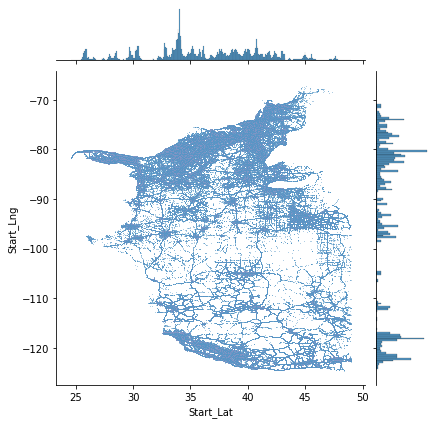

In [12]:
plt.figure(figsize=(10, 10))
sns.jointplot(x='Start_Lat', y='Start_Lng', data=accidents, kind='scatter', s=1, alpha=0.5)
plt.show()

In [13]:
accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

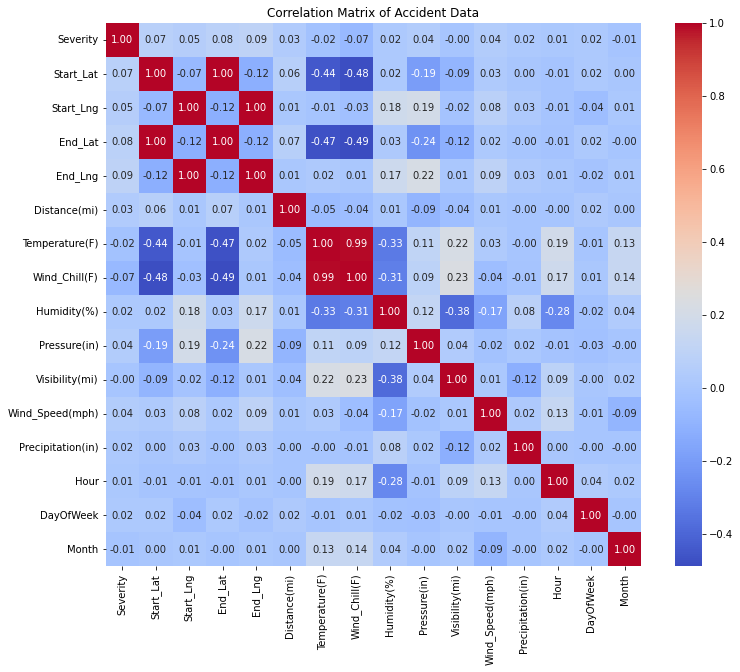

In [14]:
# Drop rows with NaT in 'Start_Time'
accidents = accidents.dropna(subset=['Start_Time'])

# Select numerical columns for correlation
numerical_cols = accidents.select_dtypes(include=['number']).columns
correlation_matrix = accidents[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Accident Data')
plt.show()

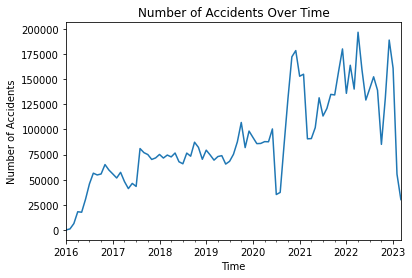

In [15]:
# Plot the number of accidents over time
accidents.set_index('Start_Time', inplace=True)
accidents.resample('M').size().plot()
plt.title('Number of Accidents Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()